# GO Subset Analysis

This is a demonstrator for some functionality in OAK

### Dependencies

We will use seaborn for plotting

In [9]:
!pip install seaborn

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

In [7]:
from oaklib.implementations.sqldb.sql_implementation import SqlImplementation
from oaklib.resource import OntologyResource
from oaklib.datamodels.vocabulary import IS_A, PART_OF
from oaklib.utilities.subsets.subset_analysis import compare_all_subsets, get_subset_dict, terms_by_subsets
from pathlib import Path

### Establish a database connection

For purposes here we will use a sqlite3 db (created using semantic-sql)

In [4]:
# TODO - download step
oi = SqlImplementation(OntologyResource(slug=f'sqlite:///input/go.db'))

In [5]:
list(oi.all_subset_curies())

['chebi_ph7_3',
 '3_STAR',
 '1_STAR',
 'goslim_plant',
 'goslim_pir',
 'goslim_flybase_ribbon',
 'goslim_chembl',
 'goslim_agr',
 'goslim_metagenomics',
 'goslim_yeast',
 'goslim_pombe',
 'gocheck_do_not_annotate',
 'goslim_generic',
 'goslim_drosophila',
 'goslim_candida',
 'goslim_aspergillus',
 'gocheck_do_not_manually_annotate',
 'goslim_synapse',
 'goslim_mouse',
 'SOFA',
 'Alliance_of_Genome_Resources',
 'biosapiens']

### Generate a term x subset Dataframe

We use terms_by_subsets from subset_utils

In [8]:
txs = list(terms_by_subsets(oi, prefix='GO', subsumed_score=0.5, min_subsets=3))

In [15]:
txs_df = pd.DataFrame(txs, columns = ['term_id', 'term_label', 'subset', 'present'])
txs_df = txs_df.pivot("term_label", "subset", "present")
txs_df

subset                      gocheck_do_not_annotate  \
term_label                                            
ATP-dependent activity                          1.0   
DNA binding                                     0.0   
DNA metabolic process                           0.0   
DNA recombination                               0.0   
DNA repair                                      0.0   
...                                             ...   
vacuole                                         0.0   
vacuole organization                            0.0   
vesicle-mediated transport                      0.5   
virion component                                0.0   
vitamin metabolic process                       0.0   

subset                      gocheck_do_not_manually_annotate  goslim_agr  \
term_label                                                                 
ATP-dependent activity                                   0.0         0.0   
DNA binding                                              0.0         1.0   
DNA metabolic process                                    0.0         1.0   
DNA recombination                                        0.0         0.0   
DNA repair                                               0.0         0.0   
...                                                      ...         ...   
vacuole                                                  0.0         1.0   
vacuole organization                                     0.0         0.0   
vesicle-mediated transport                               0.0         0.0   
virion component                                         0.0         0.0   
vitamin metabolic process                                0.0         0.0   

subset                      goslim_aspergillus  goslim_candida  goslim_chembl  \
term_label                                                                      
ATP-dependent activity                     0.5             0.5            1.0   
DNA binding                                1.0             1.0            1.0   
DNA metabolic process                      1.0             1.0            1.0   
DNA recombination                          0.0             0.0            0.0   
DNA repair                                 0.0             0.0            0.0   
...                                        ...             ...            ...   
vacuole                                    1.0             1.0            1.0   
vacuole organization                       0.0             0.0            0.0   
vesicle-mediated transport                 1.0             1.0            1.0   
virion component                           0.0             0.0            1.0   
vitamin metabolic process                  1.0             1.0            0.0   

subset                      goslim_drosophila  goslim_flybase_ribbon  \
term_label                                                             
ATP-dependent activity                    1.0                    0.0   
DNA binding                               1.0                    1.0   
DNA metabolic process                     0.5                    1.0   
DNA recombination                         1.0                    0.0   
DNA repair                                1.0                    0.0   
...                                       ...                    ...   
vacuole                                   1.0                    1.0   
vacuole organization                      1.0                    0.0   
vesicle-mediated transport                1.0                    0.0   
virion component                          0.0                    0.0   
vitamin metabolic process                 1.0                    0.0   

subset                      goslim_generic  goslim_metagenomics  goslim_mouse  \
term_label                                                                      
ATP-dependent activity                 1.0                  0.0           0.0   
DNA binding                            1.0                  0

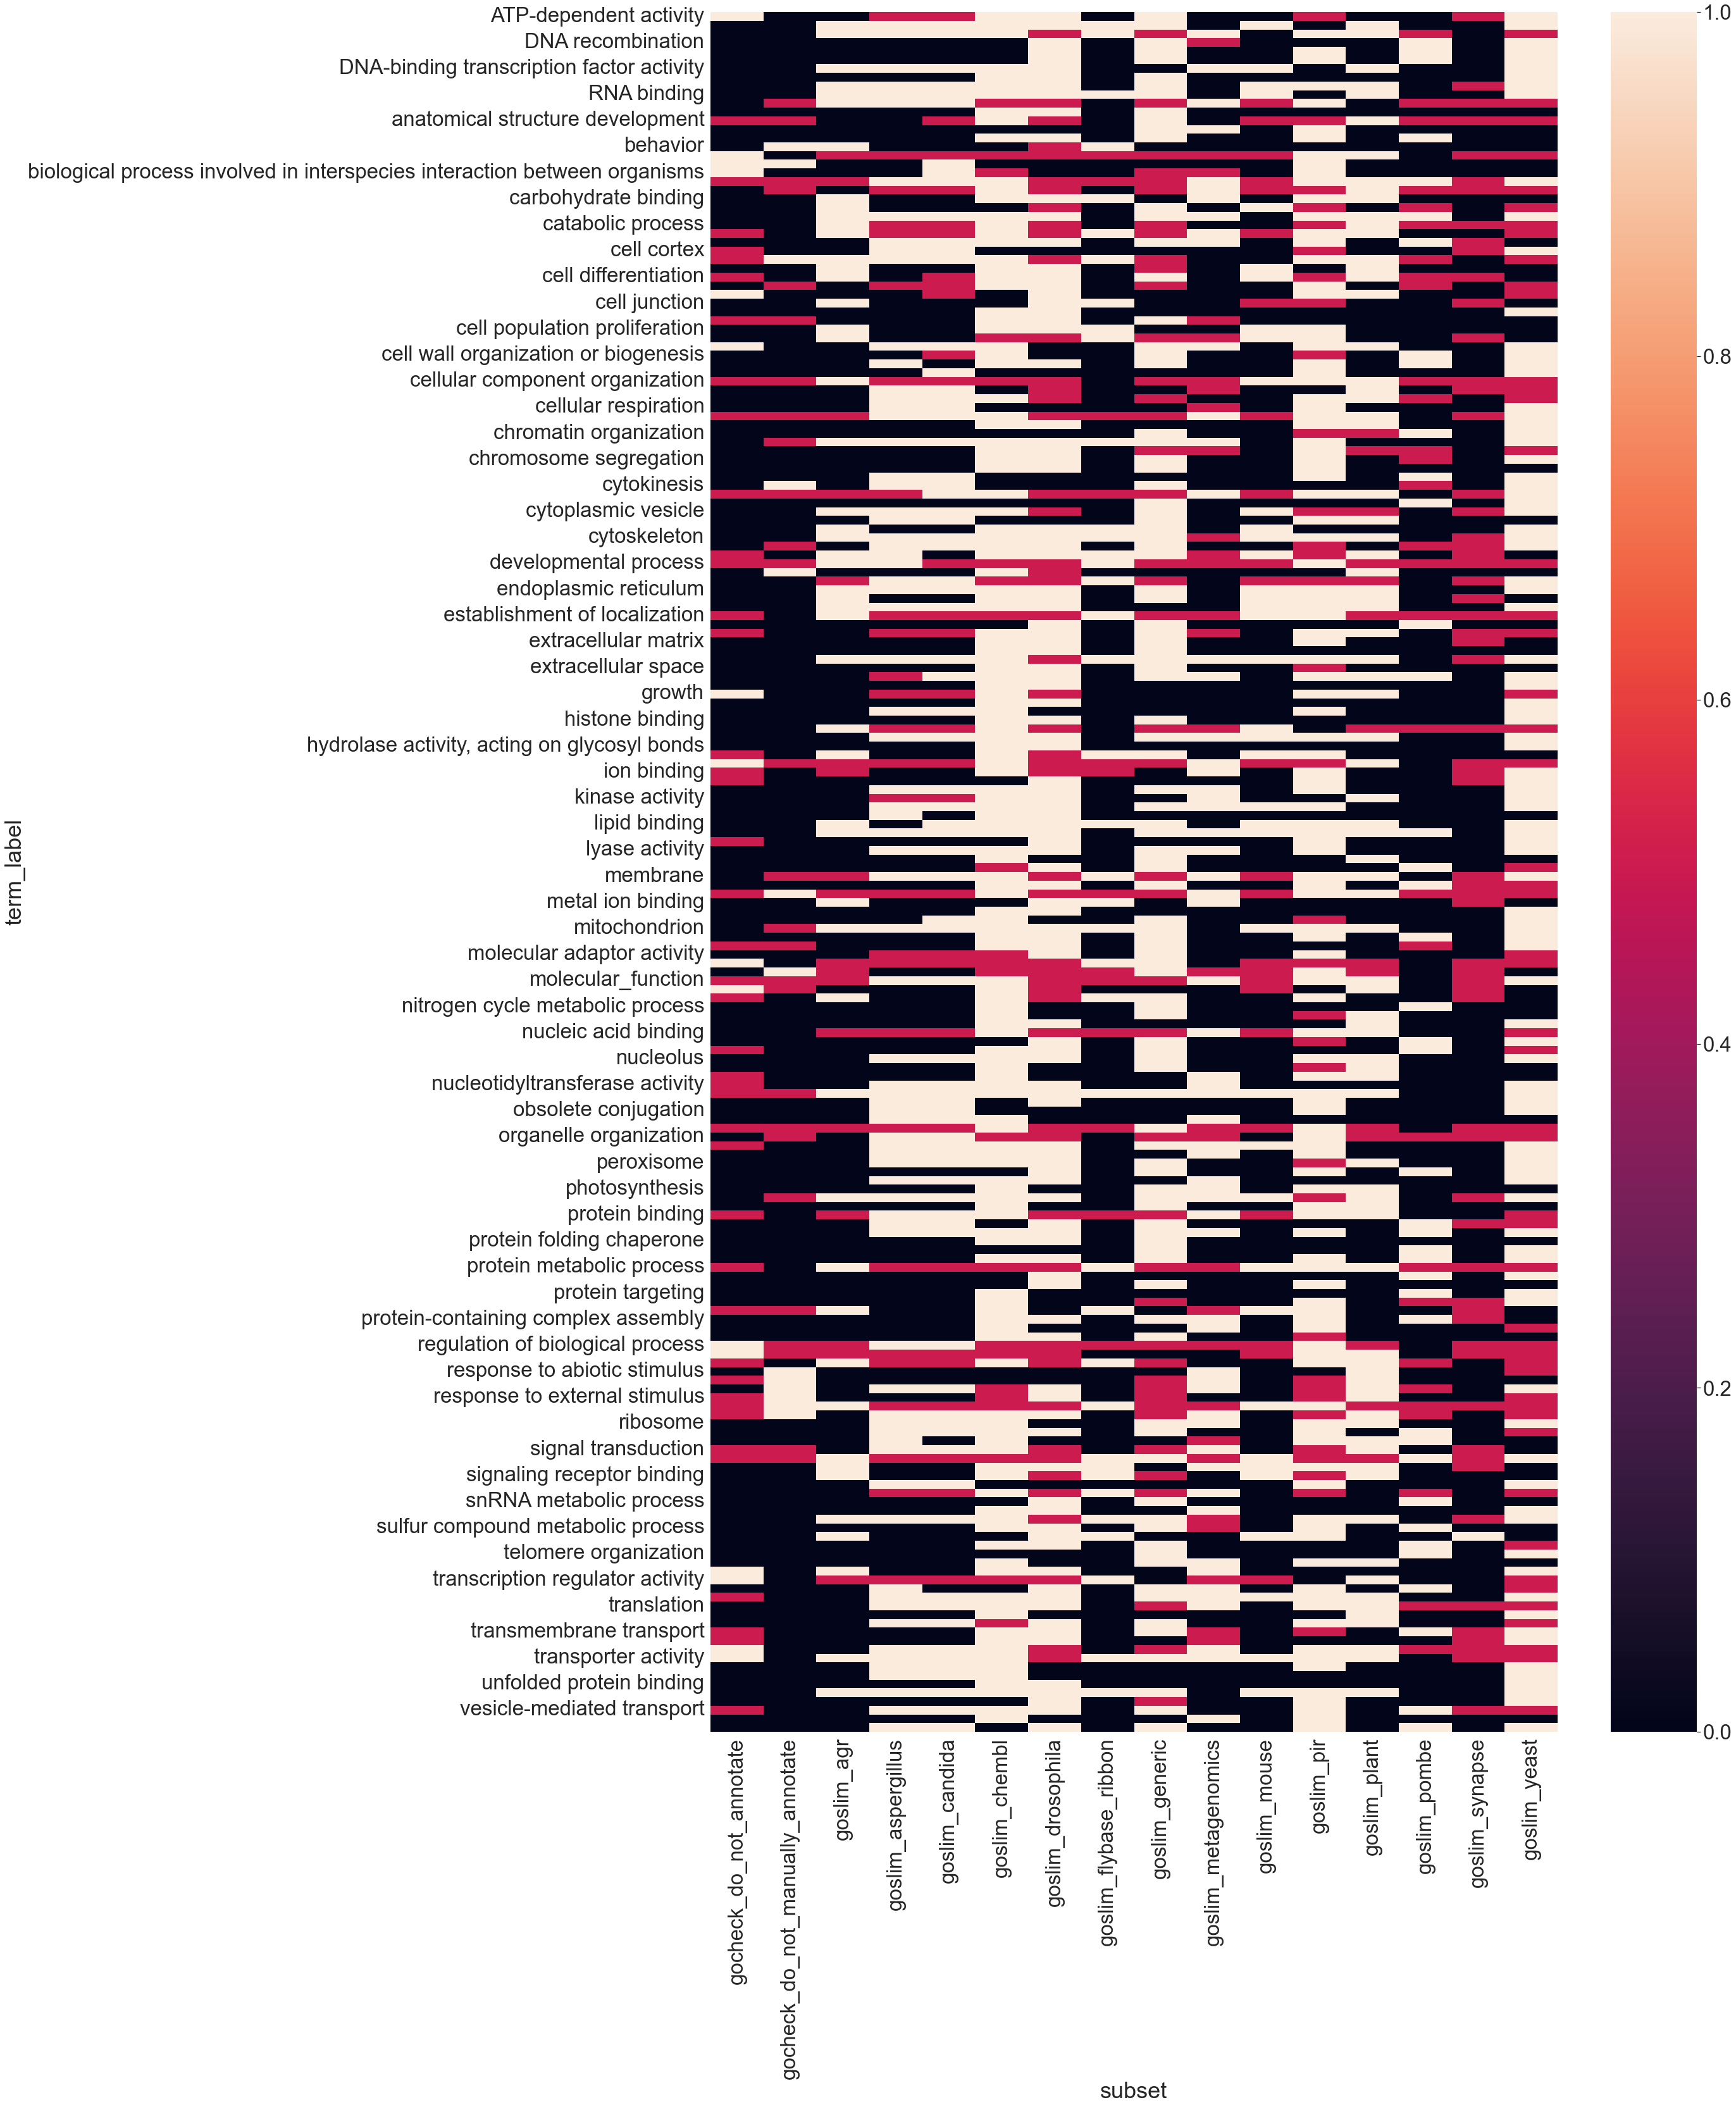

In [17]:
plt.figure(figsize = (30,50))
sns.set(font_scale = 3)
ax = sns.heatmap(txs_df)

### Clustering of terms and subset

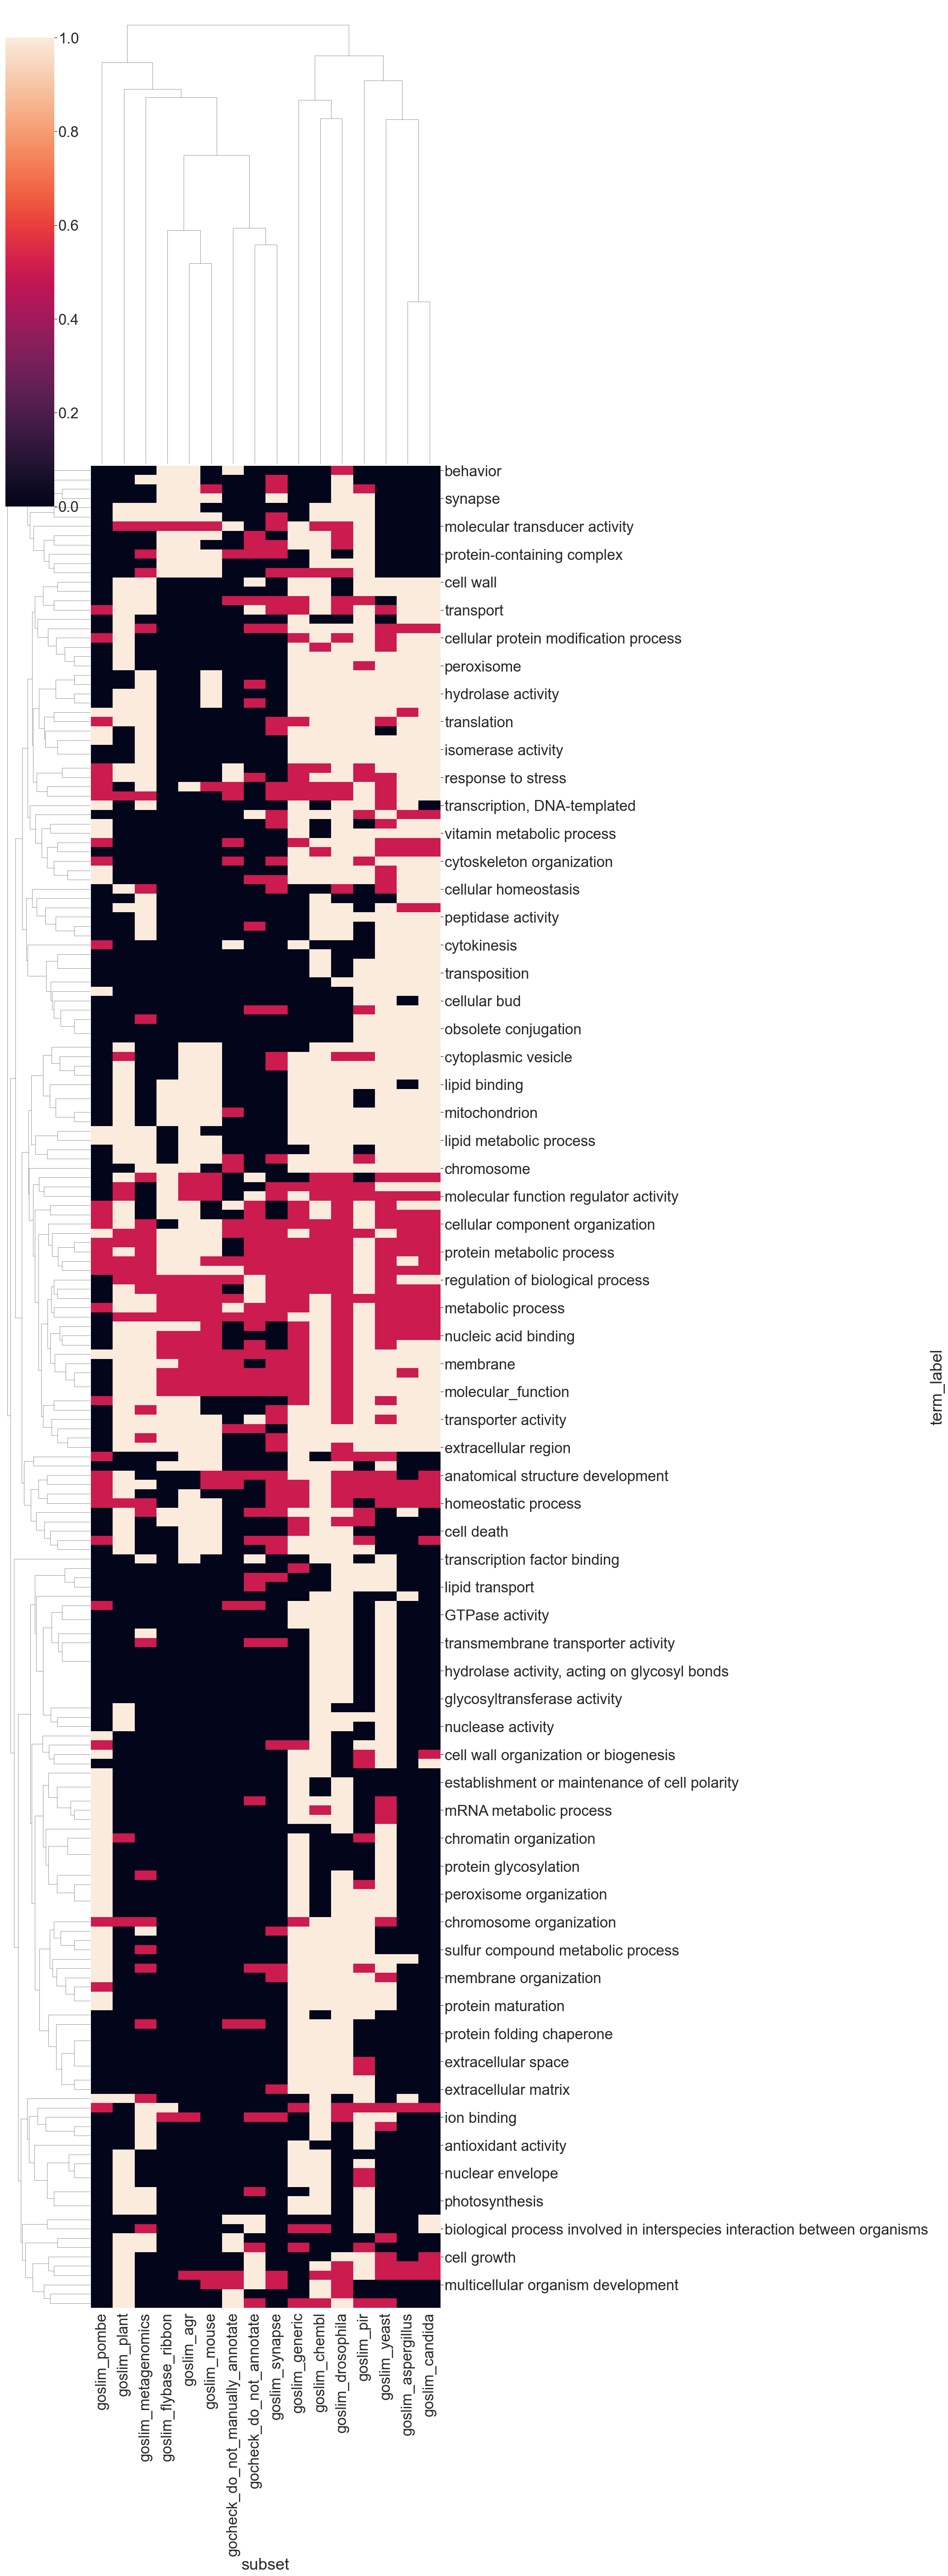

In [25]:
#plt.figure(figsize = (30,30))
#plt.xticks(rotation=45)
sns.set(font_scale = 3)
ax = sns.clustermap(txs_df, figsize = (30,80))

## Overlap Analysis

First we do a basic overlap of terms in subsets - no use of the graph

In [19]:
pairs = list(compare_all_subsets(oi, prefix='GO'))

In [20]:
def pairs_to_dm(pairs):
    """
    Create a distance matrix
    """
    rows = [(p.set1_id, p.set2_id, 1-p.jaccard_similarity) for p in pairs]
    df = pd.DataFrame(rows, columns =['subsetA', 'subsetB', 'sim'])
    df = df.pivot("subsetA", "subsetB", "sim")
    return df

In [21]:
df = pairs_to_dm(pairs)
df

subsetB                           gocheck_do_not_annotate  \
subsetA                                                     
gocheck_do_not_annotate                          0.000000   
gocheck_do_not_manually_annotate                 0.266667   
goslim_agr                                       0.750000   
goslim_aspergillus                               0.722222   
goslim_candida                                   0.533333   
goslim_chembl                                    0.625000   
goslim_drosophila                                0.647059   
goslim_flybase_ribbon                            0.684211   
goslim_generic                                   0.625000   
goslim_metagenomics                              0.466667   
goslim_mouse                                     0.750000   
goslim_pir                                       0.823529   
goslim_plant                                     0.625000   
goslim_pombe                                     0.764706   
goslim_synapse                                   0.647059   
goslim_yeast                                     0.625000   

subsetB                           gocheck_do_not_manually_annotate  \
subsetA                                                              
gocheck_do_not_annotate                                   0.266667   
gocheck_do_not_manually_annotate                          0.000000   
goslim_agr                                                0.666667   
goslim_aspergillus                                        0.578947   
goslim_candida                                            0.470588   
goslim_chembl                                             0.555556   
goslim_drosophila                                         0.578947   
goslim_flybase_ribbon                                     0.550000   
goslim_generic                                            0.555556   
goslim_metagenomics                                       0.411765   
goslim_mouse                                              0.588235   
goslim_pir                                                0.736842   
goslim_plant                                              0.555556   
goslim_pombe                                              0.684211   
goslim_synapse                                            0.500000   
goslim_yeast                                              0.470588   

subsetB                           goslim_agr  goslim_aspergillus  \
subsetA                                                            
gocheck_do_not_annotate             0.750000            0.722222   
gocheck_do_not_manually_annotate    0.666667            0.578947   
goslim_agr                          0.000000            0.250000   
goslim_aspergillus                  0.250000            0.000000   
goslim_candida                      0.333333            0.466667   
goslim_chembl                       0.461538            0.466667   
goslim_drosophila                   0.250000            0.285714   
goslim_flybase_ribbon               0.357143            0.375000   
goslim_generic                      0.333333            0.357143   
goslim_metagenomics                 0.384615            0.400000   
goslim_mouse                        0.363636            0.250000   
goslim_pir                          0.200000            0.250000   
goslim_plant                        0.333333            0.357143   
goslim_pombe                        0.416667            0.307692   
goslim_synapse                      0.384615            0.285714   
goslim_yeast                        0.333333            0.357143   

subsetB                           goslim_candida  goslim_chembl  \
subsetA                                                           
gocheck_do_not_annotate                 0.533333       0.625000   
gocheck_do_not_manually_annotate        0.470588       0.555556   
goslim_agr                              0.333333       0.461538   
goslim_aspergillus                      0.466667       0.466667   
goslim_candid

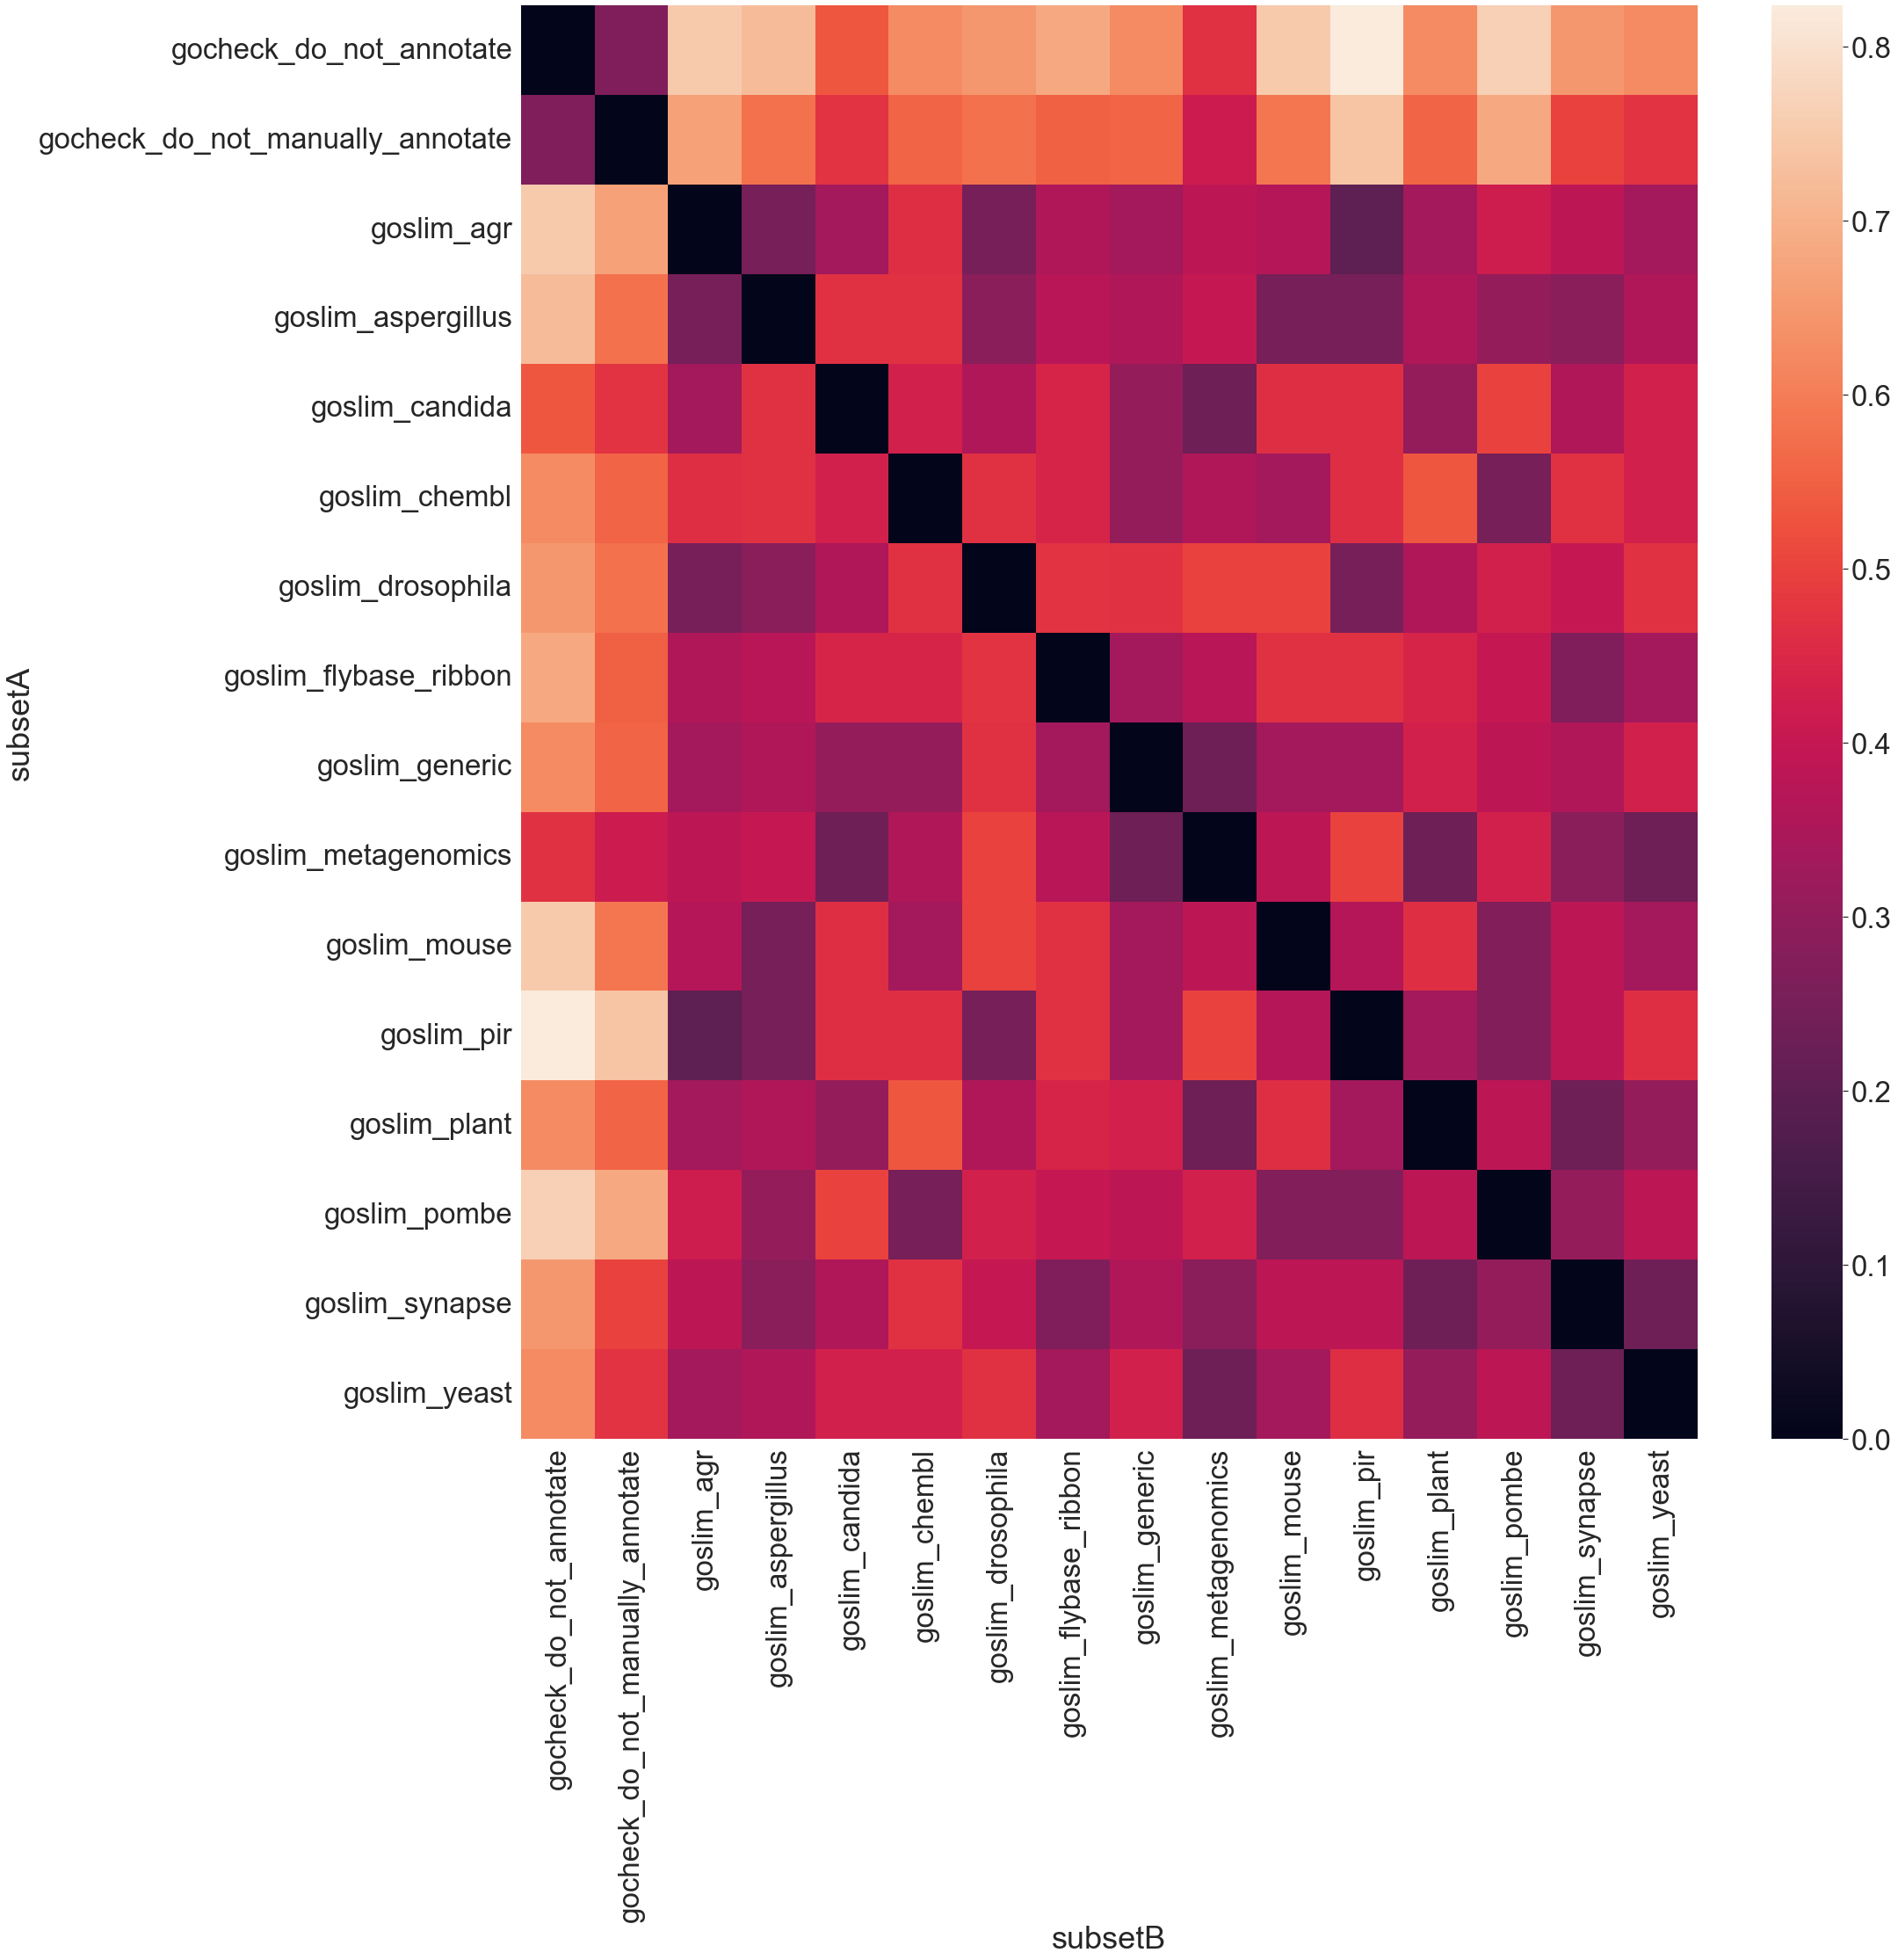

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,30))
sns.set(font_scale = 3)
ax = sns.heatmap(df)

<Figure size 5760x5760 with 0 Axes>

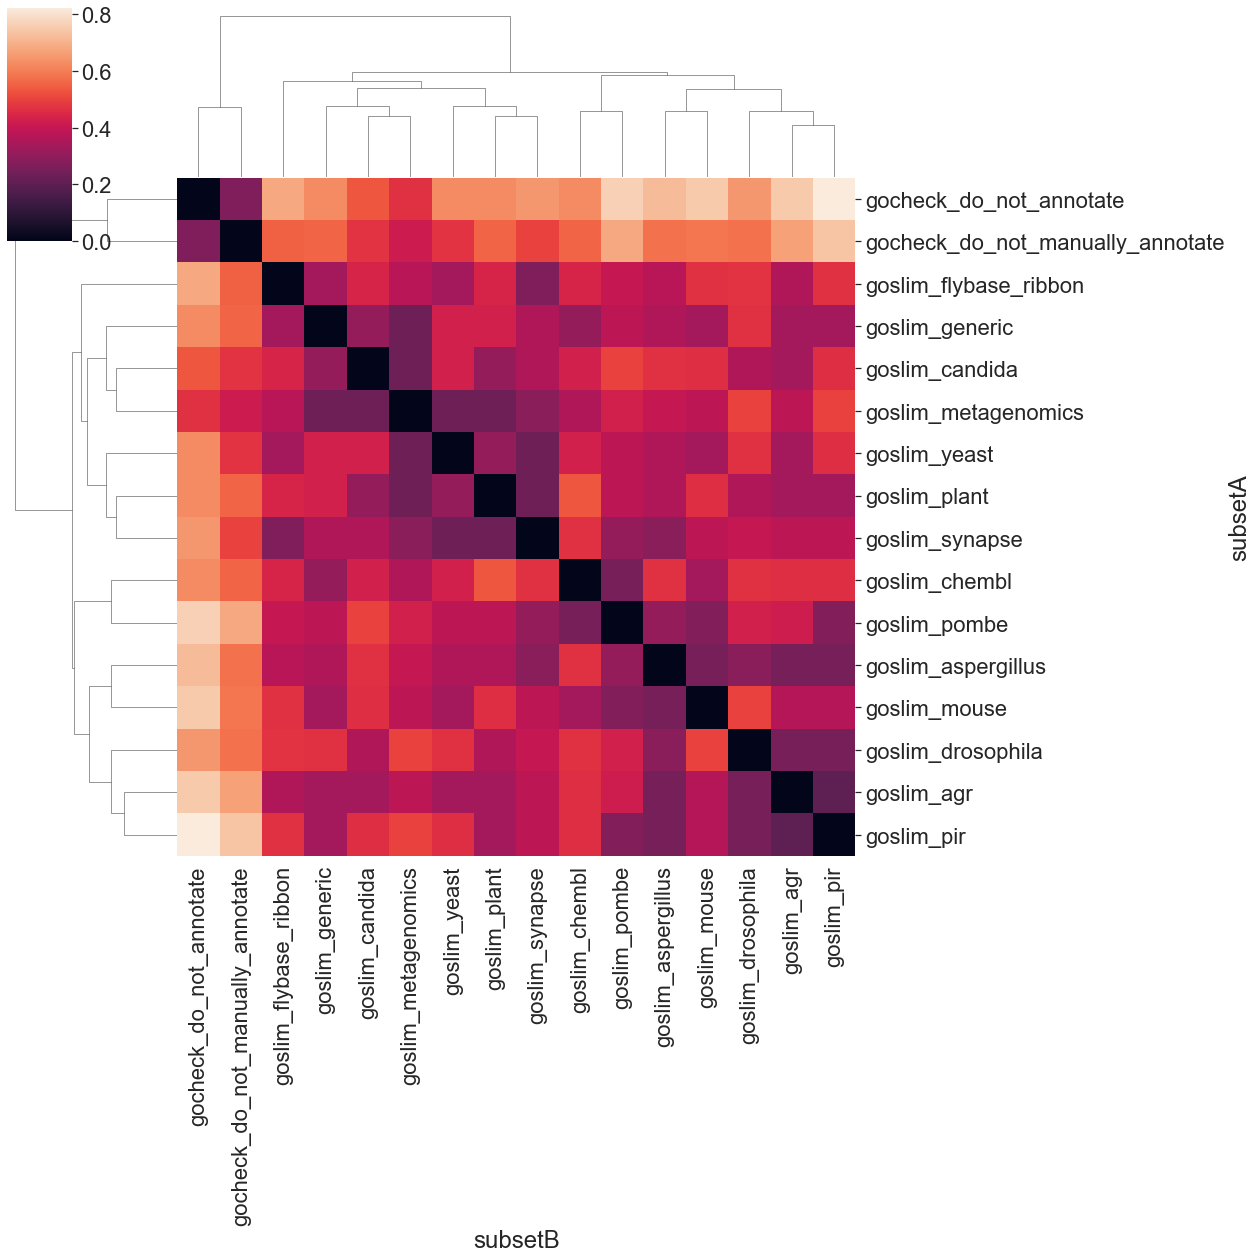

In [23]:
plt.figure(figsize = (80,80))
sns.set(font_scale = 2)
linkage = hc.linkage(sp.distance.squareform(df), method='average')
ax = sns.clustermap(df, row_linkage=linkage, col_linkage=linkage, figsize=(18,18))

### Overlap using the graph



In [24]:
pairs = list(compare_all_subsets(oi, prefix='GO', extend_down=True))

In [38]:
df = pairs_to_dm(pairs)

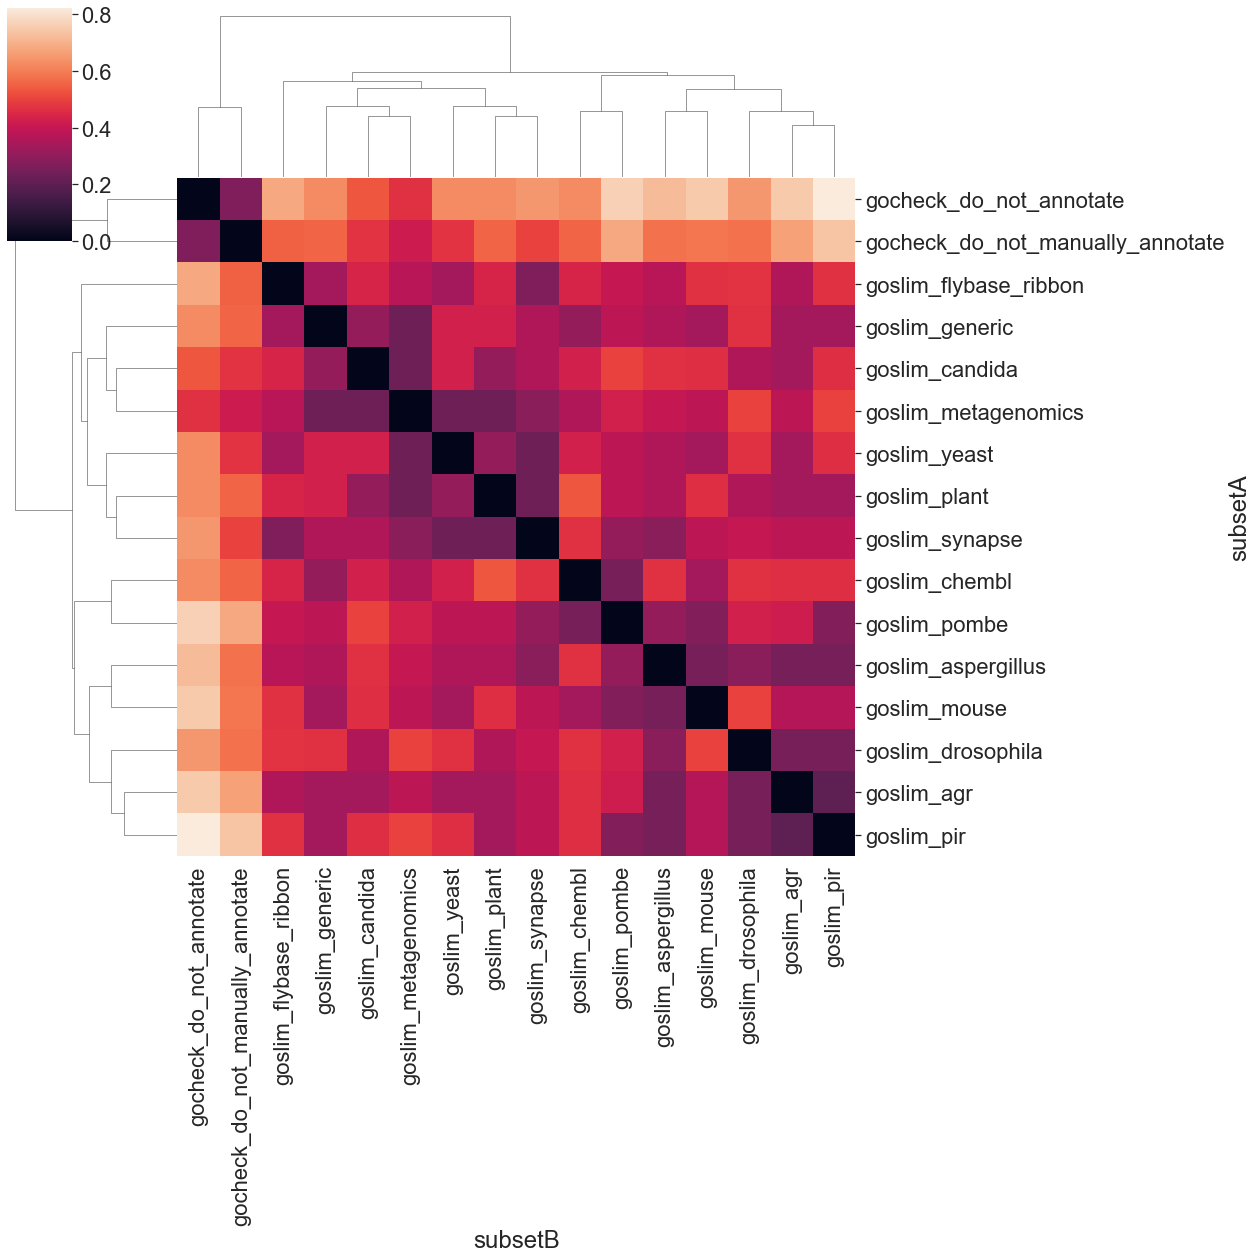

In [39]:
linkage = hc.linkage(sp.distance.squareform(df), method='average')
ax = sns.clustermap(df, row_linkage=linkage, col_linkage=linkage, figsize=(18,18))